In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

Decision tree


In [7]:
parametros = {'criterion':['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 5, 10]}

In [8]:
grid_searshcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_searshcv.fit(X_credit, y_credit)
melhoresparamentros = grid_searshcv.best_params_
melhorresultado = grid_searshcv.best_score_
print(melhoresparamentros)
print(melhorresultado)



{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


Random forest

In [9]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [10]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
0.9855


Knn

In [11]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [12]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)


{'n_neighbors': 20, 'p': 1}
0.9800000000000001


Regressão logistica

In [13]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [14]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


SVN

In [15]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [16]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


Rede neural

In [17]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [19]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


## implementação Validação cruzada

In [20]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [22]:
resultados_rede_neural

[0.9979999999999999,
 0.9984999999999999,
 0.9974999999999999,
 0.9969999999999999,
 0.9964999999999999,
 0.9975000000000002,
 0.9964999999999999,
 0.9970000000000001,
 0.9955,
 0.9975000000000002,
 0.9970000000000001,
 0.9964999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9965000000000002,
 0.998,
 0.9964999999999999,
 0.9970000000000001,
 0.998,
 0.9969999999999999,
 0.9970000000000001,
 0.998,
 0.9974999999999999,
 0.9974999999999999,
 0.9974999999999999,
 0.9959999999999999,
 0.9964999999999999,
 0.9970000000000001,
 0.9970000000000001,
 0.9970000000000001]

In [23]:
resultados = pd.DataFrame({'Arvore': resultados_arvore,
                           'Random forest': resultados_random_forest,
                           'KNN': resultados_knn,
                           'Logistica': resultados_logistica,
                           'SVM': resultados_svm,
                           'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9870,0.9840,0.9815,0.9475,0.9845,0.9980
1,0.9855,0.9845,0.9800,0.9465,0.9840,0.9985
2,0.9905,0.9785,0.9795,0.9470,0.9865,0.9975
3,0.9870,0.9825,0.9780,0.9460,0.9850,0.9970
4,0.9890,0.9830,0.9820,0.9465,0.9850,0.9965
5,0.9885,0.9870,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9890,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9835,0.9800,0.9480,0.9850,0.9970
8,0.9870,0.9840,0.9795,0.9465,0.9840,0.9955
9,0.9870,0.9840,0.9820,0.9465,0.9845,0.9975


In [24]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987333,0.983850,0.980050,0.946950,0.985083,0.997117
std,0.001621,0.002324,0.001533,0.000687,0.001280,0.000652
min,0.984000,0.978500,0.977000,0.945500,0.982000,0.995500
25%,0.986250,0.983000,0.979000,0.946500,0.984125,0.996625
50%,0.987000,0.984000,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.989000,0.982500,0.948500,0.987500,0.998500


In [25]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.164142
Random forest    0.236175
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.065425
dtype: float64

### Teste de normalidade nos resultados

In [26]:
from scipy.stats import shapiro
alpha = 0.05


In [27]:
print(shapiro(resultados_arvore),
shapiro(resultados_random_forest),
shapiro(resultados_knn),
shapiro(resultados_logistica),
shapiro(resultados_svm),
shapiro(resultados_rede_neural))

ShapiroResult(statistic=0.967652440071106, pvalue=0.4771011769771576) ShapiroResult(statistic=0.9674116373062134, pvalue=0.47099772095680237) ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475) ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786) ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849) ShapiroResult(statistic=0.9489900469779968, pvalue=0.1588405817747116)


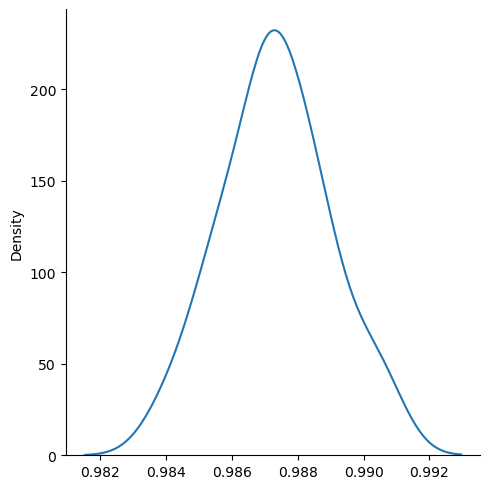

In [28]:
sns.displot(resultados_arvore, kind='kde')

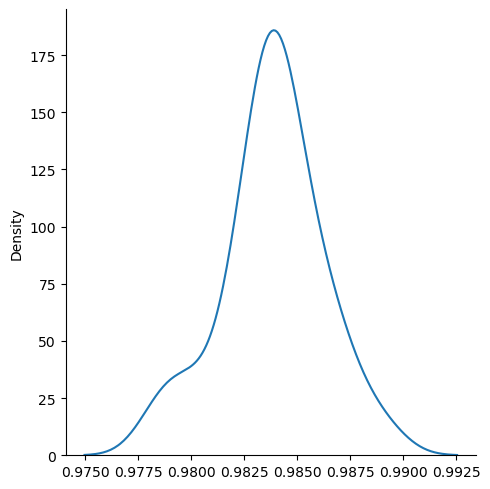

In [29]:
sns.displot(resultados_random_forest, kind = 'kde');


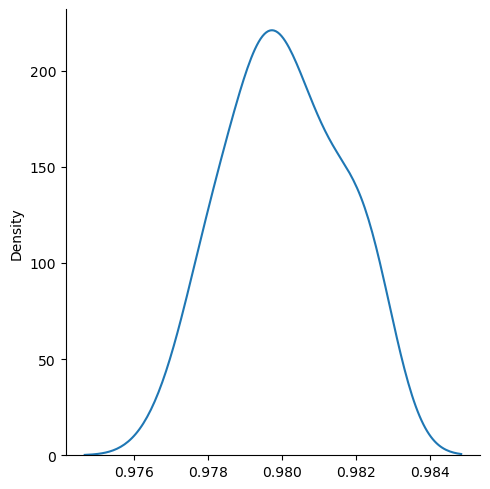

In [30]:
sns.displot(resultados_knn, kind = 'kde');

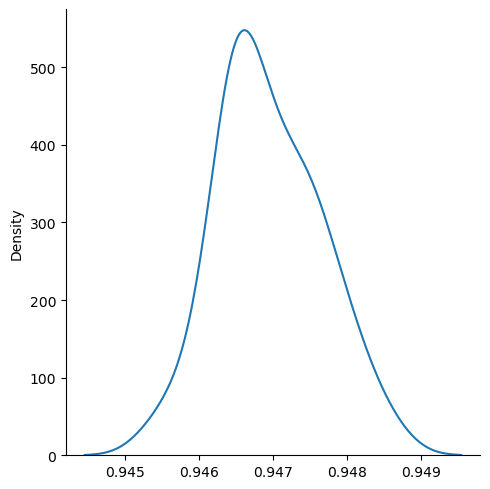

In [31]:
sns.displot(resultados_logistica, kind = 'kde');

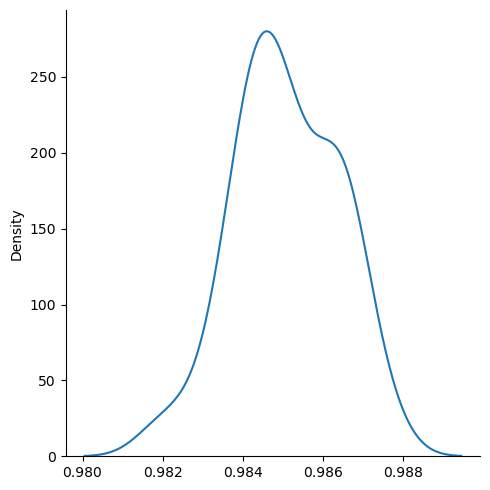

In [32]:
sns.displot(resultados_svm, kind = 'kde');

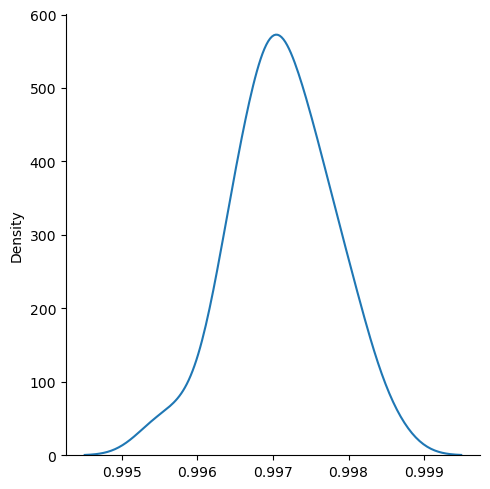

In [33]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Melhor algoritmo com ANOVA e Tukey

In [34]:
from scipy.stats import f_oneway

In [35]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.1097255440005502e-178

In [36]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [37]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [38]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9870,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9890,arvore
...,...,...
175,0.9960,rede_neural
176,0.9965,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [39]:
from statsmodels.stats.multicomp import MultiComparison

In [40]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [41]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0073    0.0 -0.0084 -0.0062   True
       arvore     logistica  -0.0404    0.0 -0.0415 -0.0393   True
       arvore random_forest  -0.0035    0.0 -0.0046 -0.0024   True
       arvore   rede_neural   0.0098    0.0  0.0087  0.0109   True
       arvore           svm  -0.0023    0.0 -0.0033 -0.0012   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn random_forest   0.0038    0.0  0.0027  0.0049   True
          knn   rede_neural   0.0171    0.0   0.016  0.0182   True
          knn           svm    0.005    0.0  0.0039  0.0061   True
    logistica random_forest   0.0369    0.0  0.0358   0.038   True
    logistica   rede_neural   0.0502    0.0  0.0491  0.0513   True
    logistica           svm   0.0381    0.0   0.037  0.0392   

In [42]:
resultados.mean()

Arvore           0.987333
Random forest    0.983850
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997117
dtype: float64

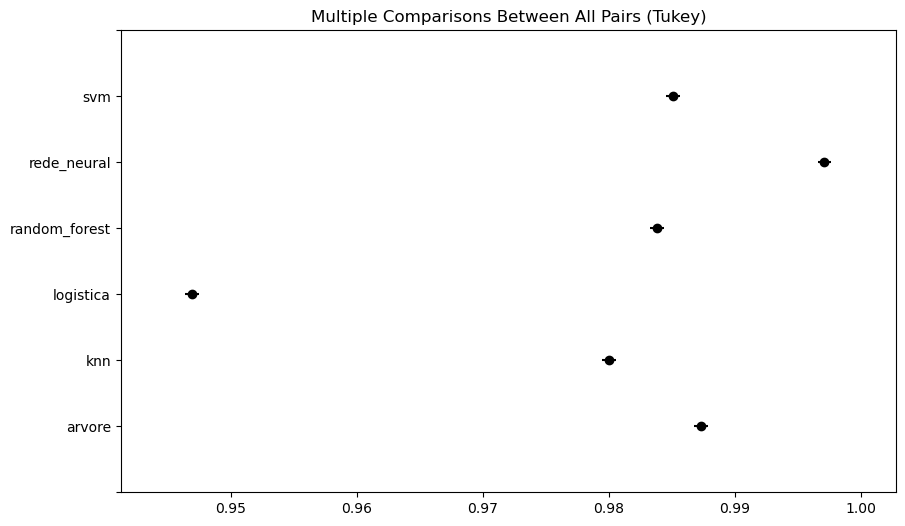

In [43]:
teste_estatistico.plot_simultaneous();

## salvar um classificador que já foi treinado

In [44]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [45]:
x_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis= 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [46]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [47]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [48]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [49]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

In [50]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav' , 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [51]:
novo_registro = x_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [52]:
novo_registro.shape

(3,)

In [53]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [54]:
rede_neural.predict(novo_registro)

array([0], dtype=int64)

In [55]:
arvore.predict(novo_registro)

array([0], dtype=int64)

In [56]:
svm.predict(novo_registro)

array([0], dtype=int64)